# Tensorflow Keras Basic Syntax

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.shape

(1000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


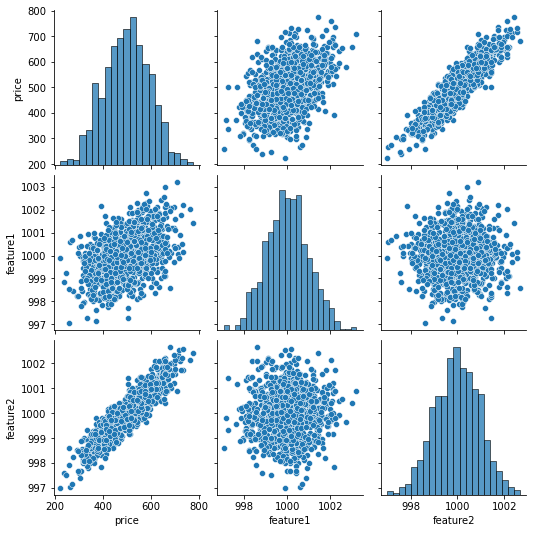

In [6]:
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

**Tensorflow uses numpy arrays instead of pandas series as in machine learning**

In [8]:
X = df[['feature1','feature2']].values
y=df['price'].values

In [9]:
X[:5]

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       [ 999.9522513 , 1000.44094031],
       [1000.44601093, 1000.33853129]])

In [10]:
y[:5]

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

**Scaling the Data**

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# help(MinMaxScaler)

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train.max()

1.0

In [20]:
X_train.min()

0.0

## Creating Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# help(Sequential)

In [23]:
# help(Dense)

In [24]:
model = Sequential([Dense(4, activation='relu'),
                   Dense(2, activation='relu'),
                   Dense(1)])

In [25]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [26]:
model.fit(x=X_train, y= y_train, epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 2ms/sample - loss: 257023.0544
Epoch 2/250
700/700 [==============================] - 0s 61us/sample - loss: 256814.0829
Epoch 3/250
700/700 [==============================] - 0s 66us/sample - loss: 256678.9806
Epoch 4/250
700/700 [==============================] - 0s 56us/sample - loss: 256603.4824
Epoch 5/250
700/700 [==============================] - 0s 53us/sample - loss: 256546.5851
Epoch 6/250
700/700 [==============================] - 0s 54us/sample - loss: 256488.2979
Epoch 7/250
700/700 [==============================] - 0s 54us/sample - loss: 256423.6061
Epoch 8/250
700/700 [==============================] - 0s 66us/sample - loss: 256351.3754
Epoch 9/250
700/700 [==============================] - 0s 57us/sample - loss: 256270.4333
Epoch 10/250
700/700 [==============================] - 0s 83us/sample - loss: 256180.0958
Epoch 11/250
700/700 [==============================] - 0s 76us/sample - loss: 

In [27]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

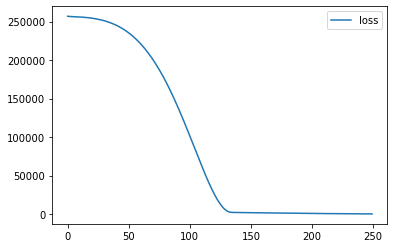

In [28]:
loss_df.plot()

### Model Evaluation

In [29]:
model.evaluate(X_test, y_test, verbose=0)

191.26710103352863

In [30]:
model.evaluate(X_train, y_train, verbose=0)

198.27686401367188

In [31]:
test_predictions = model.predict(X_test)

In [32]:
# test_predictions

In [33]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [34]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [35]:
pred_df.head()

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [36]:
pred_df=pd.concat([pred_df, test_predictions], axis=1)

In [37]:
pred_df.columns=['Test True Y', 'Model Predictions']

In [38]:
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,419.884399
1,624.156198,608.161194
2,582.455066,581.848206
3,578.588606,562.110779
4,371.224104,383.109283


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

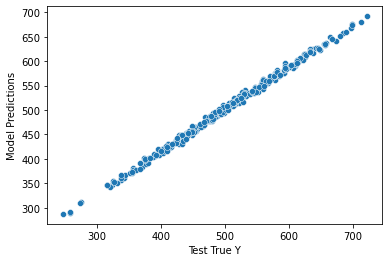

In [39]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

11.004877495749684

In [42]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [43]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

191.26711476101335

In [44]:
# Root mean squared error
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions']) ** 0.5 

13.829935457586682

In [45]:
new_gem = [[998,1000]]

In [46]:
new_gem = scaler.transform(new_gem)

In [47]:
model.predict(new_gem)

array([[429.13214]], dtype=float32)

In [48]:
from tensorflow.keras.models import load_model

In [53]:
model.save('my_gem_model.h5')

In [ ]:
!pip uninstall h5py

In [57]:
!pip install h5py==2.10.0

  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\micha\\anaconda3\\envs\\tensorflow_cpu\\lib\\site-packages\\~5py\\defs.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [58]:
later_model = load_model('my_gem_model.h5')

AttributeError: 'str' object has no attribute 'decode'

In [51]:
later_model.predict(new_gem)

NameError: name 'later_model' is not defined

<br>

<br>

<br>

**_This notebook is part of "Python for Data Science and Machine Learning Bootcamp" Udemy Course by Jose Portilla._**